### **Predicting the cost of health insurance for a person**

#### The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

#### **Step 1:** Load the data

In [21]:
# Import pandas
import pandas as pd
import numpy as np

# Read the data from file using read_csv
medical_insurance_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Step 2:** Exploratory Data Analysis

In [3]:
# Dataframe information
medical_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataframe has 1338 rows and 7 columns. There are:
- Four (4) numerical variables: age, bmi, children, charges
- Three (3) categorical variables: sex, smoker, region
- No missing values
- All the columns are important to predict the charges

In [4]:
# duplicate rows
medical_insurance_df.duplicated().sum()

1

In [5]:
# drop duplicates
medical_insurance_df.drop_duplicates(inplace=True)

In [6]:
# describe dataframe
medical_insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


/tmp/ipykernel_6595/1250625915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0], data=medical_insurance_df, x='sex', palette=palette)
/tmp/ipykernel_6595/1250625915.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1], data=medical_insurance_df, x='smoker', palette=palette)
/tmp/ipykernel_6595/1250625915.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[2], data=medical_insurance_df, x='region', palette=palette)


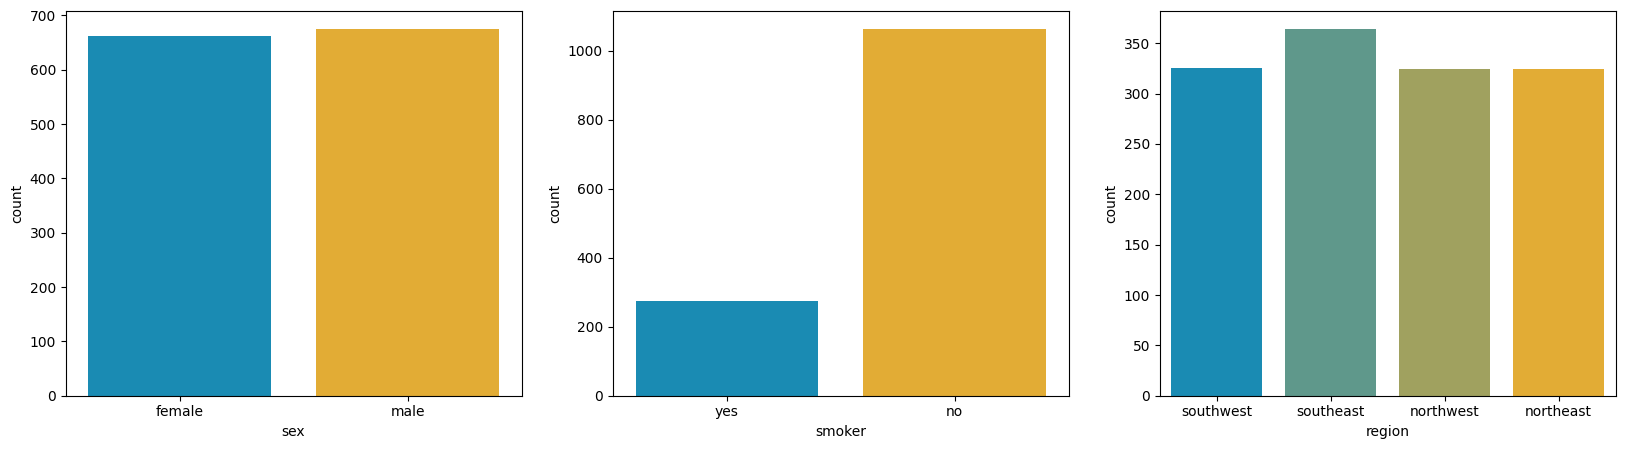

In [7]:
# Visualize the categorical variables with countplot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Set the palette colors
palette = "blend:#0097CD,#FFB718"

# Create the countplot for sex
sns.countplot(ax=ax[0], data=medical_insurance_df, x='sex', palette=palette)
# Create the countplot for smoker
sns.countplot(ax=ax[1], data=medical_insurance_df, x='smoker', palette=palette)
# Create the countplot for region
sns.countplot(ax=ax[2], data=medical_insurance_df, x='region', palette=palette)

# Show the plot
plt.show()


We can observe the following:
- The sex of the person is almost equally distributed
- The majority of the people are non-smokers
- People come from 4 different regions, where the majority of them are from the southeast

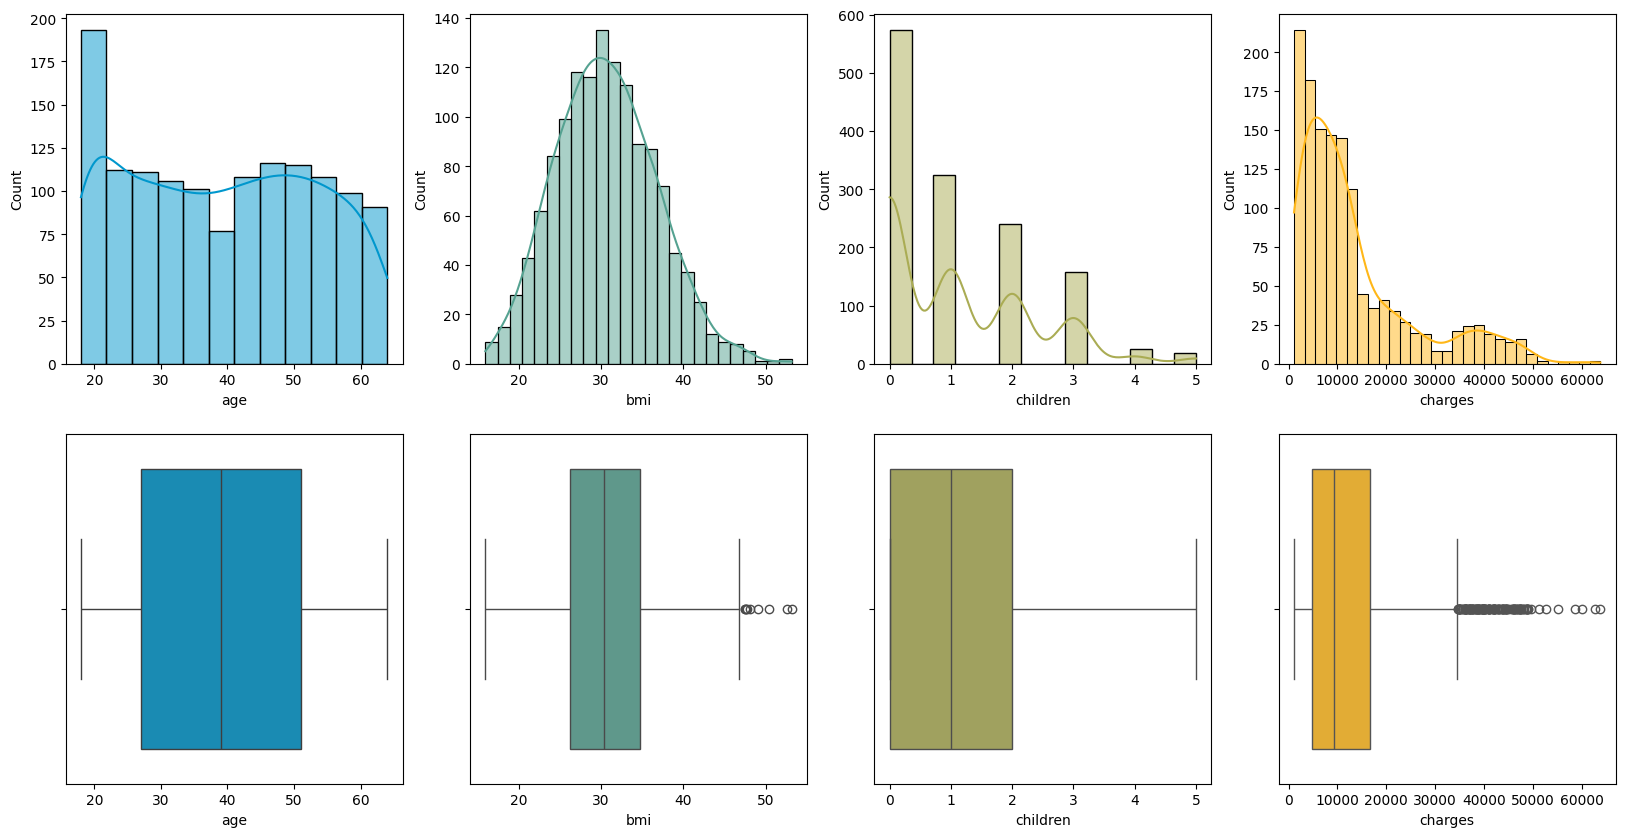

In [8]:
# Visualize the numerical variables with histogram and boxplot
# Create the figure and axes objects
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Set the colors
color = sns.color_palette(palette, 4)
# Create the histogram for age
sns.histplot(ax=ax[0, 0], data=medical_insurance_df, x='age', kde=True, color=color[0])
# Create the boxplot for age
sns.boxplot(ax=ax[1, 0], data=medical_insurance_df, x='age', color=color[0])
# Create the histogram for bmi
sns.histplot(ax=ax[0, 1], data=medical_insurance_df, x='bmi', kde=True, color=color[1])
# Create the boxplot for bmi
sns.boxplot(ax=ax[1, 1], data=medical_insurance_df, x='bmi',color=color[1])
# Create the histogram for children
sns.histplot(ax=ax[0, 2], data=medical_insurance_df, x='children', kde=True, color=color[2])
# Create the boxplot for children
sns.boxplot(ax=ax[1, 2], data=medical_insurance_df, x='children', color=color[2])
# Create the histogram for charges
sns.histplot(ax=ax[0, 3], data=medical_insurance_df, x='charges', kde=True, color=color[3])
# Create the boxplot for charges
sns.boxplot(ax=ax[1, 3], data=medical_insurance_df, x='charges', color=color[3])

# Show the plot
plt.show()


We can see the following:
- The age and the bmi are normally distributed
- The majority of the people have no children
- The charges are right skewed (positive skewness).

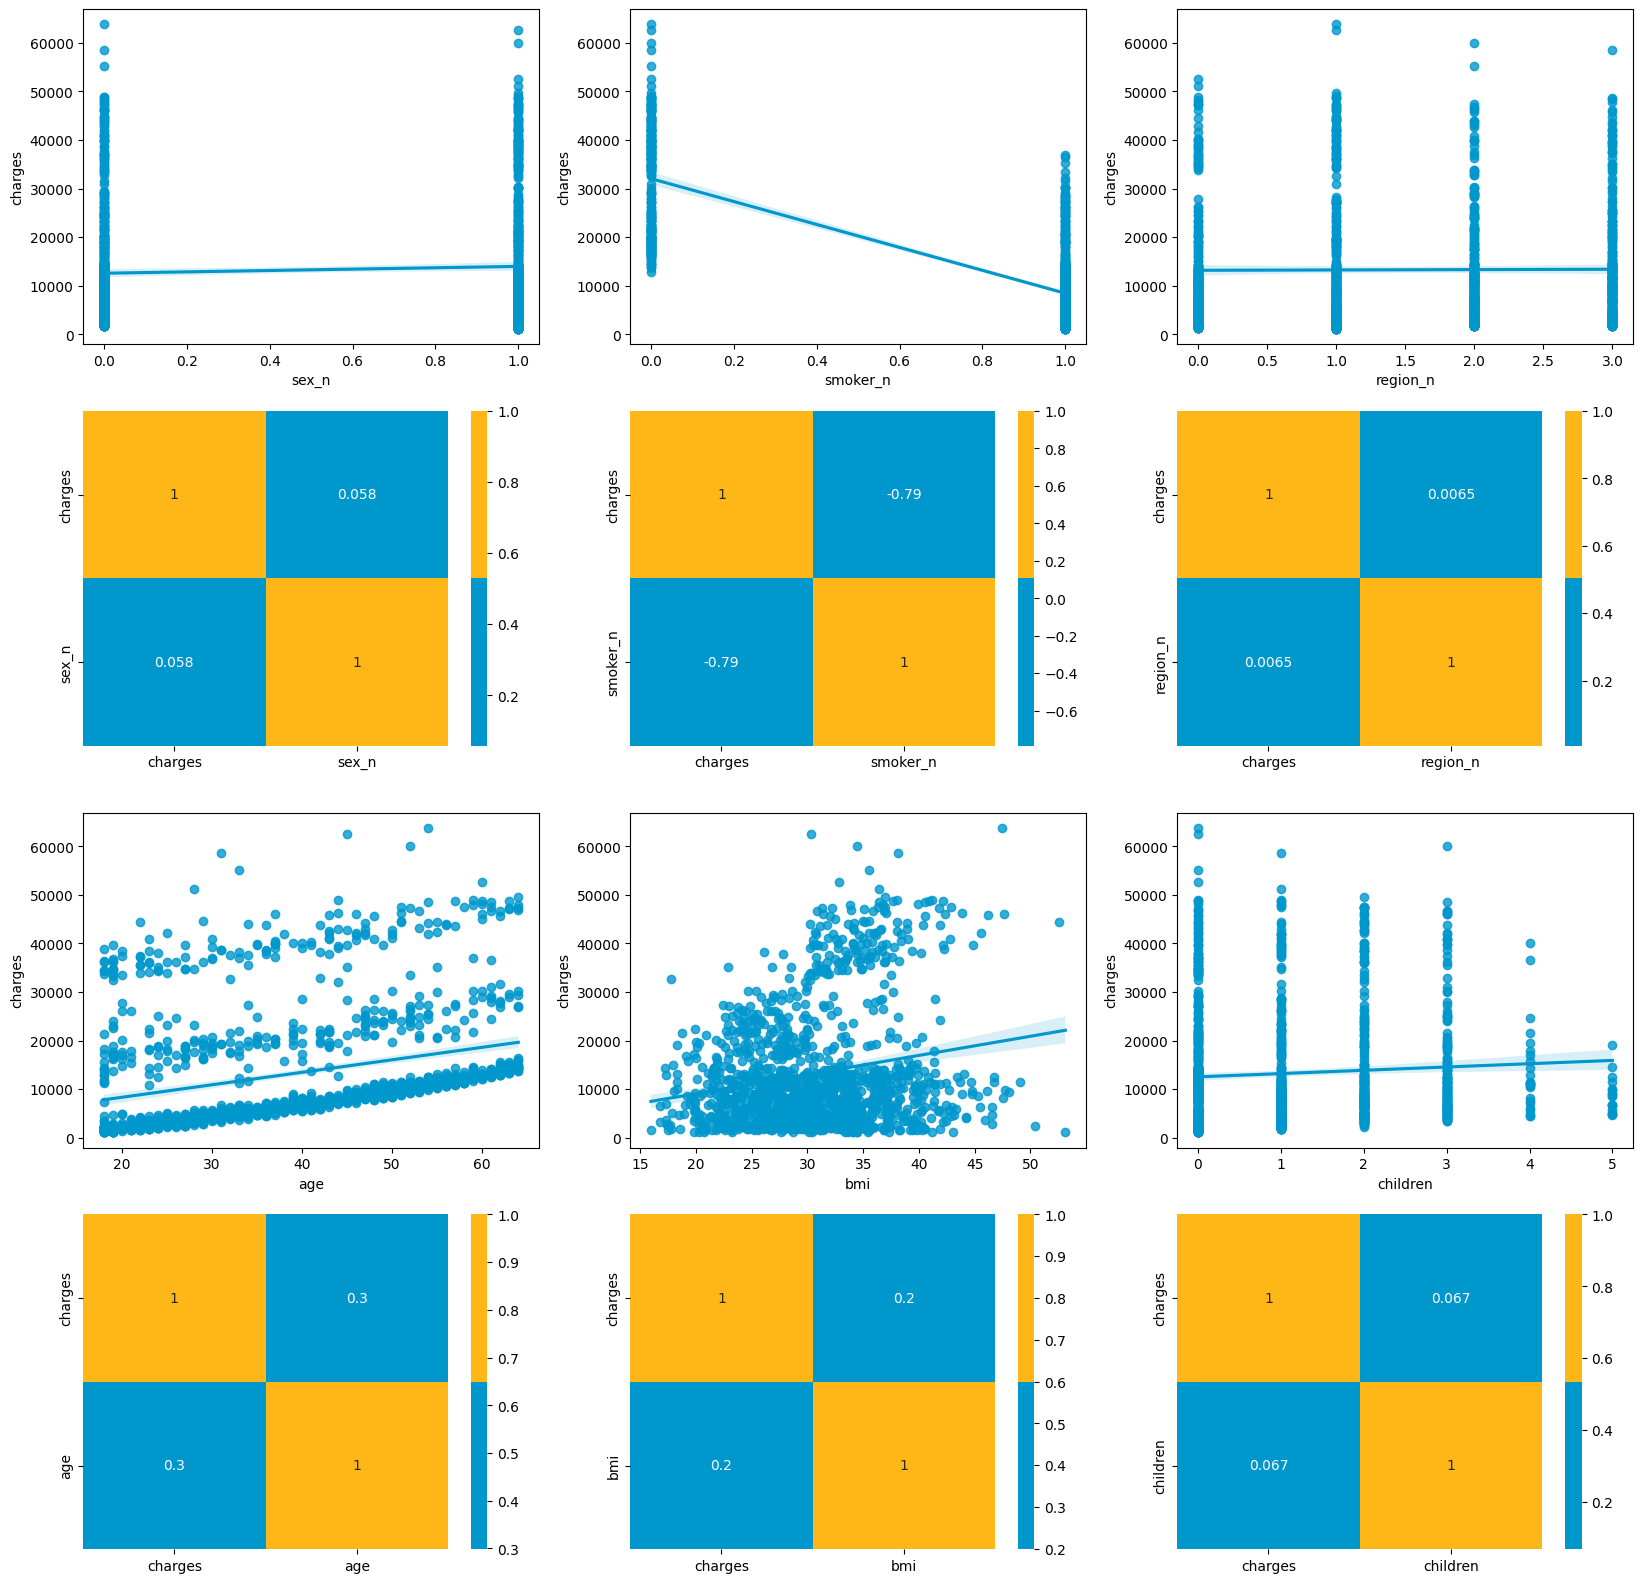

In [9]:
# Multivariate analysis
# Encode the categorical variables to numerical values
medical_insurance_df['sex_n'] = pd.factorize(medical_insurance_df['sex'])[0]
medical_insurance_df['smoker_n'] = pd.factorize(medical_insurance_df['smoker'])[0]
medical_insurance_df['region_n'] = pd.factorize(medical_insurance_df['region'])[0]

# Create a reglot and heatmap to visualize the correlation between variables
# Create the figure and axes objects
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

# Define your custom colors as real numbers (RGB values)
import matplotlib.colors as mcolors
color1 = mcolors.to_rgba("#0097CD")
color2 = mcolors.to_rgba("#FFB718")

# Create a custom colormap using the specified colors
custom_cmap = mcolors.ListedColormap([color1, color2])

# Create the regplot and heatmap for sex_n
sns.regplot(ax = ax[0, 0], data = medical_insurance_df, x = 'sex_n', y = 'charges', color = color[0])
sns.heatmap(ax = ax[1, 0], data = medical_insurance_df[['charges', 'sex_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for smoker_n
sns.regplot(ax = ax[0, 1], data = medical_insurance_df, x = 'smoker_n', y = 'charges', color = color[0])
sns.heatmap(ax = ax[1, 1], data = medical_insurance_df[['charges', 'smoker_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for region_n
sns.regplot(ax = ax[0, 2], data = medical_insurance_df, x = 'region_n', y = 'charges', color = color[0])
sns.heatmap(ax = ax[1, 2], data = medical_insurance_df[['charges', 'region_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for age
sns.regplot(ax = ax[2, 0], data = medical_insurance_df, x = 'age', y = 'charges', color = color[0])
sns.heatmap(ax = ax[3, 0], data = medical_insurance_df[['charges', 'age']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for bmi
sns.regplot(ax = ax[2, 1], data = medical_insurance_df, x = 'bmi', y = 'charges', color = color[0])
sns.heatmap(ax = ax[3, 1], data = medical_insurance_df[['charges', 'bmi']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for children
sns.regplot(ax = ax[2, 2], data = medical_insurance_df, x = 'children', y = 'charges', color = color[0])
sns.heatmap(ax = ax[3, 2], data = medical_insurance_df[['charges', 'children']].corr(), annot = True, cmap = custom_cmap)

# Show the plot
plt.show()


There is not correlation between the variables, except for the age and the charges, and the bmi and the charges, where the correlation is positive and moderate.

In [11]:
# Feature engineering
# Scale the variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Fit the data
numeric_columns = ['sex_n', 'smoker_n', 'region_n', 'age', 'bmi', 'children', 'charges']

# Create the scaler object
scaler = MinMaxScaler()

# Scale the variables
scale_features = scaler.fit_transform(medical_insurance_df[numeric_columns])
medical_insurance_scaled_df = pd.DataFrame(scale_features, columns=numeric_columns)
medical_insurance_scaled_df.head()

,sex_n,smoker_n,region_n,age,bmi,children,charges
0,0.0,0.0,0.000000,0.021739,0.321227,0.0,0.251611
1,1.0,1.0,0.333333,0.000000,0.479150,0.2,0.009636
2,1.0,1.0,0.333333,0.217391,0.458434,0.6,0.053115
3,1.0,1.0,0.666667,0.326087,0.181464,0.0,0.333010
4,1.0,1.0,0.666667,0.304348,0.347592,0.0,0.043816


In [12]:
# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the feature and the target columns
X = medical_insurance_scaled_df.drop(columns=['charges'])
y = medical_insurance_scaled_df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the best features
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)

# Create a dataframe with the features
X_train_sel = pd.DataFrame(selector.transform(X_train), columns=X_train.columns[selector.get_support()])
X_test_sel = pd.DataFrame(selector.transform(X_test), columns=X_test.columns[selector.get_support()])

# Show the results
X_train_sel.head()

,sex_n,smoker_n,age,bmi,children
0,1.0,1.0,0.108696,0.230024,0.0
1,1.0,1.0,0.065217,0.263250,0.4
2,0.0,1.0,0.739130,0.580172,0.4
3,1.0,1.0,0.978261,0.686306,0.0
4,0.0,1.0,0.630435,0.286252,0.4


In [13]:
X_test_sel.head()

,sex_n,smoker_n,age,bmi,children
0,1.0,1.0,0.673913,0.176352,0.0
1,0.0,1.0,0.239130,0.259349,0.8
2,0.0,1.0,0.717391,0.549502,0.6
3,1.0,0.0,0.282609,0.495830,0.6
4,1.0,1.0,0.282609,0.603444,0.4


In [14]:
# Add the target column to the selected features
X_train_sel['charges'] = y_train.values
X_test_sel['charges'] = y_test.values

# Save the selected features to a csv file
X_train_sel.to_csv('../data/processed/train.csv', index=False)
X_test_sel.to_csv('../data/processed/test.csv', index=False)

### **Step 3:** Build the linear regression model

In [15]:
# Read the data from file
train_df = pd.read_csv('../data/processed/train.csv')
test_df = pd.read_csv('../data/processed/test.csv')

# Show the first rows of the train dataframe
train_df.head()

,sex_n,smoker_n,age,bmi,children,charges
0,1.0,1.0,0.108696,0.230024,0.0,0.020339
1,1.0,1.0,0.065217,0.263250,0.4,0.034446
2,0.0,1.0,0.739130,0.580172,0.4,0.516374
3,1.0,1.0,0.978261,0.686306,0.0,0.196070
4,0.0,1.0,0.630435,0.286252,0.4,0.137177


In [16]:
# Separate the feature and the target columns
X_train = train_df.drop(columns=['charges'])
y_train = train_df['charges']

# Separate the feature and the target columns
X_test = test_df.drop(columns=['charges'])
y_test = test_df['charges']

In [17]:
# Create the linear regression model
from sklearn.linear_model import LinearRegression

# Create the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Know the parameters of the model
print('Intercept:', linear_model.intercept_)
print('Coefficients:', linear_model.coef_)

Intercept: 0.3203501952546871
Coefficients: [-0.00135721 -0.36794733  0.18289935  0.18131339  0.04293502]


In [19]:
# Predict the values
y_pred = linear_model.predict(X_test)
y_pred

array([ 1.06278880e-01,  7.75111183e-02,  2.09006406e-01,  4.86343560e-01,
        1.29321026e-01,  1.96597743e-01,  4.58426905e-01,  8.98925865e-03,
        1.56389743e-01,  1.62161230e-01,  1.48397883e-01,  5.09788093e-01,
        4.69438384e-01,  2.60151710e-01,  1.45143530e-01,  1.37718714e-01,
        5.07050721e-02,  4.93001056e-01,  3.77835811e-02,  7.12131265e-02,
        4.34752752e-02,  4.58001767e-01,  2.23173949e-01,  4.71271422e-01,
        4.75452764e-01,  6.76984638e-02,  5.52020704e-01,  5.68132723e-01,
        1.56539344e-01,  2.00600742e-01,  7.77732443e-02,  1.89840514e-01,
       -4.46562665e-03,  1.78943192e-01,  6.16900337e-01,  1.81174078e-01,
        6.09712422e-02,  4.53397717e-02,  4.82252611e-01,  1.31294323e-01,
        8.46218686e-02,  4.56852449e-01,  5.41763595e-01,  1.70548767e-01,
        1.00369934e-01,  4.01626205e-02,  7.10346032e-02,  1.28390311e-01,
        4.94081474e-02,  1.31618014e-01,  9.24578657e-02,  1.64760058e-01,
        4.73752733e-01,  

In [22]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate the root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root mean squared error:', rmse)

# Calculate the r squared score
r2 = r2_score(y_test, y_pred)
print('R squared score:', r2)

Mean squared error: 0.00914735426913473
Root mean squared error: 0.09564180189192763
R squared score: 0.8046218811772659


### **Step 4:** Optimize the model

#### A Linear Regression model does not have hyperparameters to optimise. We must use another model to perform improvements like a regularized model. We will study more about this in the next module.